# Machine Learning Project

### Company Bankruptcy Prediction

Names:    
    - Denis Mugisha   
    - Liu Guangqiang   
    - Rachel Fanti   
    
Dataset: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

Data: May/2021

## Libraries

In [ ]:
# Basics
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from collections import Counter

In [ ]:
# Statistic funtions
from numpy.random import seed


In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [ ]:
# Evaluation of the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

## Reading data 

In [ ]:
df_complete = pd.read_csv('data.csv', header=0) 
df_feat = pd.read_csv('bankruptcy (1).csv')
df_feat

,Unnamed: 0,features,importance,select_tree,rank_rfecv,selected_rfecv,corr
0,47,Inventory Turnover Rate (times),0.001875,True,1,True,0.012556
1,71,Quick Asset Turnover Rate,0.000000,True,1,True,0.036946
2,61,Inventory/Working Capital,0.025644,True,1,True,0.055539
3,56,Cash/Total Assets,0.023681,True,1,True,0.150828
4,55,Current Assets/Total Assets,0.003832,True,1,True,0.044232
...,...,...,...,...,...,...,...
90,2,ROA(B) before interest and depreciation after...,0.000000,False,71,False,0.224163
91,48,Fixed Assets Turnover Frequency,0.000000,True,72,False,0.047546
92,32,Current Ratio,0.000000,False,73,False,0.189644
93,1,ROA(A) before interest and % after tax,0.000000,False,74,False,0.222410


In [ ]:
col = df_feat[df_feat['selected_rfecv']==True]['features'].values
col = np.insert(col, 0, 'Bankrupt?')
print(col)

['Bankrupt?' ' Inventory Turnover Rate (times)'
 ' Quick Asset Turnover Rate' ' Inventory/Working Capital'
 ' Cash/Total Assets' ' Current Assets/Total Assets'
 ' Allocation rate per person' ' Net profit before tax/Paid-in capital'
 ' Borrowing dependency' ' Net worth/Assets' ' Interest Expense Ratio'
 ' Cash Reinvestment %' ' Net Value Growth Rate'
 ' Net Value Per Share (B)' ' Current Liability to Current Assets'
 ' Interest-bearing debt interest rate'
 " Net Income to Stockholder's Equity"
 ' Degree of Financial Leverage (DFL)' ' Total assets to GNP price'
 ' Non-industry income and expenditure/revenue' ' Operating Expense Rate'
 ' Research and development expense rate']


In [ ]:
df = df_complete.loc[:, col]

In [ ]:
df

,Bankrupt?,Inventory Turnover Rate (times),Quick Asset Turnover Rate,Inventory/Working Capital,Cash/Total Assets,Current Assets/Total Assets,Allocation rate per person,Net profit before tax/Paid-in capital,Borrowing dependency,Net worth/Assets,...,Net Value Growth Rate,Net Value Per Share (B),Current Liability to Current Assets,Interest-bearing debt interest rate,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Total assets to GNP price,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate
0,1,1.820926e-04,6.550000e+09,0.276920,0.004094,0.190643,0.037135,0.137757,0.390284,0.792424,...,0.000327,0.147950,0.118250,7.250725e-04,0.827890,0.026601,0.009219,0.302646,1.256969e-04,0.000000e+00
1,1,9.360000e+09,7.700000e+09,0.289642,0.014948,0.182419,0.012335,0.168962,0.376760,0.828824,...,0.000443,0.182251,0.047775,6.470647e-04,0.839969,0.264577,0.008323,0.303556,2.897851e-04,0.000000e+00
2,1,6.500000e+07,1.022676e-03,0.277456,0.000991,0.602806,0.141016,0.148036,0.379093,0.792484,...,0.000396,0.177911,0.025346,7.900790e-04,0.836774,0.026555,0.040003,0.302035,2.361297e-04,2.550000e+07
3,1,7.130000e+09,6.050000e+09,0.276580,0.018851,0.225815,0.021320,0.147561,0.379743,0.848535,...,0.000382,0.154187,0.067250,4.490449e-04,0.834697,0.026697,0.003252,0.303350,1.078888e-04,0.000000e+00
4,1,1.633674e-04,5.050000e+09,0.287913,0.014161,0.358380,0.023988,0.167461,0.375025,0.893491,...,0.000439,0.167502,0.047725,6.860686e-04,0.839973,0.024752,0.003878,0.303475,7.890000e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,4.030000e+07,1.244230e-04,0.277543,0.099481,0.578455,0.006312,0.171111,0.373823,0.875382,...,0.000450,0.175045,0.027951,1.790179e-04,0.840359,0.027064,0.000466,0.303510,1.510213e-04,4.500000e+09
6815,0,9.940000e+09,1.173396e-04,0.277368,0.080337,0.444043,0.003401,0.171805,0.372505,0.900747,...,0.000445,0.181324,0.031470,2.370237e-04,0.840306,0.027009,0.001959,0.303520,5.220000e+09,1.440000e+09
6816,0,2.797309e-04,1.749713e-04,0.277022,0.412885,0.496053,0.002774,0.172287,0.369637,0.961061,...,0.000435,0.269521,0.007542,0.000000e+00,0.840138,0.026791,0.002840,0.303512,2.509312e-04,1.039086e-04
6817,0,4.550000e+09,1.351937e-04,0.277353,0.112238,0.564439,0.007489,0.182498,0.369649,0.913021,...,0.000529,0.213392,0.022916,2.110211e-04,0.841084,0.026822,0.002837,0.303498,1.236154e-04,2.510000e+09


In [ ]:
# df.to_csv('./data/bankruptcy_22.csv')

### Splitting data into train/ test sets

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
# Split into train and val/test sets
xTrain, xTest, yTrain, yTest = train_test_split(X,  y, test_size=0.4)


## Data imbalance

In [ ]:
print(f"yTrain = {Counter (yTrain)}")
print(f"                   0: {Counter(yTrain)[0]/len(yTrain):.0%},  1: {Counter(yTrain)[1]/len(yTrain):.0%}")
print()
print(f"yTest = {Counter (yTest)}")
print(f"                  0: {Counter(yTest)[0]/len(yTest):.0%},  1: {Counter(yTest)[1]/len(yTest):.0%}")

yTrain = Counter({0: 3962, 1: 129})
                   0: 97%,  1: 3%

yTest = Counter({0: 2637, 1: 91})
                  0: 97%,  1: 3%


## Gaussian Naive Bayes

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers (Wikipedia).

There are 3 models of naive bayes:
- Gaussian Naive Bayes - When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution. 
- Multinomial Naive Bayes - With a multinomial event model, samples represent the frequencies with which certain events have been generated by a multinomial.
- Bernoulli Naive Bayes - In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks,[10] where binary term occurrence features are used rather than term frequencies.

The model that fits better in this case, binary classification in bankrupt or not, is Bernoulli Naive Bayes.

In [ ]:
gnb = GaussianNB()
y_pred_g = gnb.fit(xTrain, yTrain).predict(xTest)


### Evaluation the Algorithm

**Confusion matrix:**  
- True positives: positive tuples correctly labeled   
- True negatives: negative tuples correctly labeled   
- False positives: negative tuples incorrectly labeled   
- False negatives: positive tuples incorrectly labeled   

**Classification report:**   
- Accuracy = (TP+TN)/(TP+TN+FP+FN)   
- Precision = TP/(TP+FP)   
- Recall = TP/(TP+FN)   
- F1 - measure = 2rp/(r+p)   
- WeightedAccuracy = (Wtp*TP+Wtn*TN)/(Wtp*TP+Wtn*TN+Wfp*FP+Wfn*FN)  

**Error:**
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)

#### Classification Report

In [ ]:
print("Report:",metrics.classification_report(yTest, y_pred_g))
    

Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2637
           1       0.00      0.00      0.00        91

    accuracy                           0.96      2728
   macro avg       0.48      0.50      0.49      2728
weighted avg       0.93      0.96      0.95      2728



#### Confusion Matrix

In [ ]:
pd.DataFrame(metrics.confusion_matrix(yTest, y_pred_g),
    columns=['Predict No', 'Predict Yes'],
    index=['Actual No', 'Actual Yes'])

,Predict No,Predict Yes
Actual No,2627,10
Actual Yes,91,0


#### Mean Squared Error

In [ ]:
mean_squared_error(yTest, y_pred_g)

0.03702346041055719

#### Mean Absolute Error

In [ ]:
mean_absolute_error(yTest, y_pred_g)

0.03702346041055719

#### ROC Curve

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(yTest, y_pred_g)
auc = metrics.auc(fpr, tpr)
print("Area Under ROC curve is :", auc)

Area Under ROC curve is : 0.4981039059537353


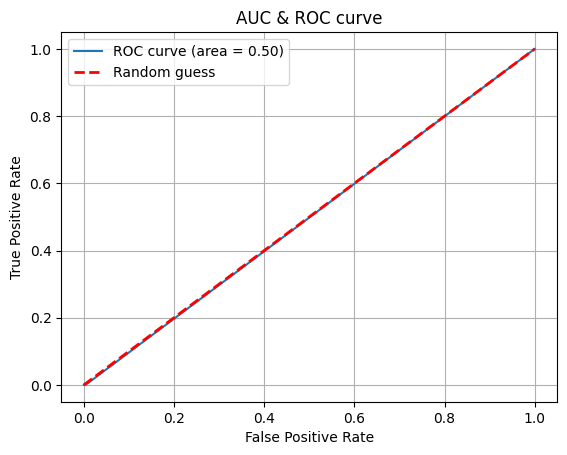

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('AUC & ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(yTest, y_pred_g)

0.4981039059537353

## Handle Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

X_smote, y_smote = smote.fit_resample(X,y)

In [ ]:
# Split into train and val/test sets
xTrain_smote, xTest_smote, yTrain_smote, yTest_smote = train_test_split(X_smote,  y_smote, test_size=0.4)

In [ ]:
print(f"yTrain_smote = {Counter(yTrain_smote)}")
print(f"                   0: {Counter(yTrain_smote)[0]/len(yTrain_smote):.0%},  1: {Counter(yTrain_smote)[1]/len(yTrain_smote):.0%}")
print()
print(f"yTest_smote = {Counter (yTest_smote)}")
print(f"                  0: {Counter(yTest_smote)[0]/len(yTest_smote):.0%},  1: {Counter(yTest_smote)[1]/len(yTest_smote):.0%}")

yTrain_smote = Counter({0: 3981, 1: 3937})
                   0: 50%,  1: 50%

yTest_smote = Counter({1: 2662, 0: 2618})
                  0: 50%,  1: 50%


## Gaussian Naive Bayes with balanced data 

In [ ]:
gnb = GaussianNB()
y_pred_g_smote = gnb.fit(xTrain_smote, yTrain_smote).predict(xTest_smote)

### Evaluation the Algorithm

#### Classification Report

In [ ]:
print("Report:",metrics.classification_report(yTest_smote, y_pred_g_smote))
    

Report:               precision    recall  f1-score   support

           0       0.51      0.97      0.66      2618
           1       0.69      0.08      0.14      2662

    accuracy                           0.52      5280
   macro avg       0.60      0.52      0.40      5280
weighted avg       0.60      0.52      0.40      5280



#### Confusion Matrix

In [ ]:
pd.DataFrame(metrics.confusion_matrix(yTest_smote, y_pred_g_smote),
    columns=['Predict No', 'Predict Yes'],
    index=['Actual No', 'Actual Yes'])

,Predict No,Predict Yes
Actual No,2528,90
Actual Yes,2458,204


#### Mean Squared Error

In [ ]:
mean_squared_error(yTest_smote, y_pred_g_smote)

0.4825757575757576

#### Mean Absolute Error

In [ ]:
mean_absolute_error(yTest_smote, y_pred_g_smote)

0.4825757575757576

#### ROC Curve

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(yTest_smote, y_pred_g_smote)
auc = metrics.auc(fpr, tpr)
print("Area Under ROC curve is :", auc)

Area Under ROC curve is : 0.5211283611866986


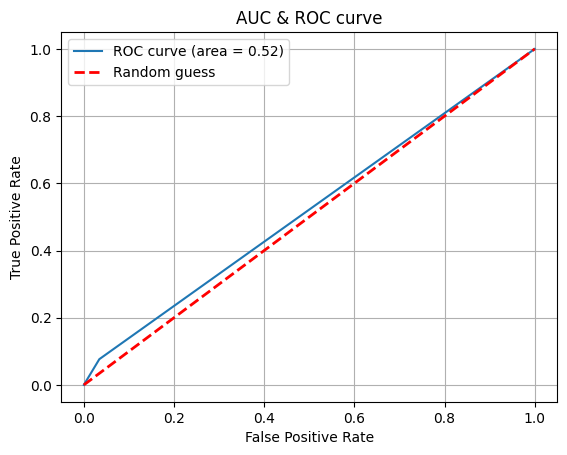

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('AUC & ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(yTest_smote, y_pred_g_smote)

0.5211283611866986

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41a30818-97d0-4136-9b87-e05a91508403' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>